In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from load_csv import load
from matplotlib.ticker import MultipleLocator, FuncFormatter

In [4]:
df = load('../resources/population_total.csv')
df

loading dataset of dimensions (197, 301)


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,416k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,47.2k,...,315k,314k,314k,314k,313k,313k,312k,312k,311k,310k
Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,54.5M,54.4M,54.3M,54.1M,54M,53.8M,53.7M,53.5M,53.4M,53.2M
South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,1.5M,...,79.8M,79.8M,79.7M,79.7M,79.6M,79.5M,79.5M,79.4M,79.3M,79.2M


In [5]:

def convert_population(val: str) -> int:
    if isinstance(val, str):
        val = val.strip().lower()
        if val.endswith('b'):
            return int(float(val[:-1]) * 1_000_000_000)
        elif val.endswith('m'):   # ล้าน
            return int(float(val[:-1]) * 1_000_000)
        elif val.endswith('k'): # พัน
            return int(float(val[:-1]) * 1_000)
        else:  # ไม่มี suffix
            return int(float(val))
    return val

df = df.applymap(convert_population)
df

/var/folders/61/t2b76ygn4c79y4xnnd8nxg1c0000gn/T/ipykernel_954/3640367300.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(convert_population)


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,168000000,170000000,172000000,175000000,177000000,179000000,182000000,184000000,186000000,188000000
Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,416000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63000,62900,62900,62800,62700,62700,62600,62500,62500,62400
United Arab Emirates,40200,40200,40200,40200,40200,40200,40200,40200,40200,40200,...,12300000,12400000,12500000,12500000,12600000,12700000,12700000,12800000,12800000,12900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,47300,47300,47300,47300,47300,47300,47300,47200,47200,47200,...,315000,314000,314000,314000,313000,313000,312000,312000,311000,310000
Yemen,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,...,54500000,54400000,54300000,54100000,54000000,53800000,53700000,53500000,53400000,53200000
South Africa,1450000,1450000,1460000,1460000,1470000,1470000,1480000,1490000,1490000,1500000,...,79800000,79800000,79700000,79700000,79600000,79500000,79500000,79400000,79300000,79200000


In [18]:
df = df.loc[:, df.columns.astype(int) <= 2050]

In [ ]:
def set_custom_yticks(ax, data):
    max_val = np.max(data)

    # เลือก scale ตาม max
    if max_val < 10_000:       # หลักพัน
        step = 2_000
    elif max_val < 100_000:    # หลักหมื่น
        step = 20_000
    elif max_val < 1_000_000:  # หลักแสน
        step = 200_000
    elif max_val < 10_000_000: # หลักล้าน
        step = 2_000_000
    else:
        step = 20_000_000

    # set locator
    ax.yaxis.set_major_locator(MultipleLocator(step))

    # formatter
    def format_fn(x, pos):
        if x >= 1_000_000:
            return f"{int(x/1_000_000)}M"
        elif x >= 1_000:
            return f"{int(x/1_000)}k"
        return str(int(x))
    
    ax.yaxis.set_major_formatter(FuncFormatter(format_fn))

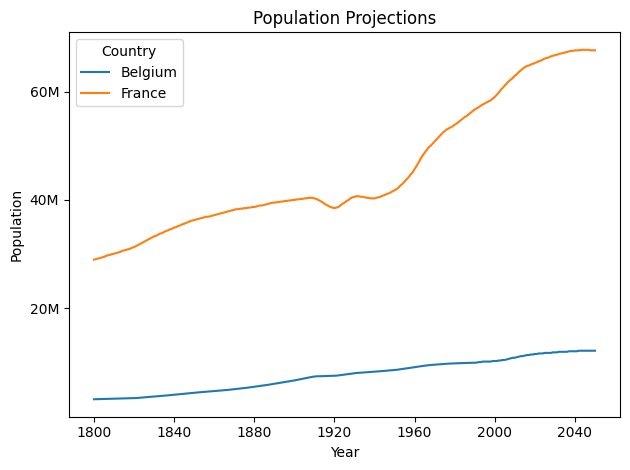

In [24]:

def plot_two_countries(df, country1, country2):
    # transpose: row=year, column=country
    data = df.T[[country1, country2]]

    # reset index เพื่อให้ year กลายเป็น column
    data = data.reset_index().rename(columns={"index": "Year"})
    data["Year"] = data["Year"].astype(int)

    # melt ให้อยู่ใน long-form (เหมาะกับ seaborn)
    data_melted = data.melt(id_vars="Year", var_name="Country", value_name="Population")

    # plot
    g = sns.lineplot(data=data_melted, x="Year", y="Population", hue="Country")
    g.set_title('Population Projections')
    g.xaxis.set_major_locator(MultipleLocator(40))
    
    set_custom_yticks(g, data_melted["Population"].values)
    # plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_two_countries(df, 'Belgium', 'France')